In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from google.colab import files


In [ ]:
try:
    df = pd.read_csv("/content/ifood_df.csv")
    print("✅ File loaded successfully!")
except:
    uploaded = files.upload()
    for fn in uploaded.keys():
        df = pd.read_csv(fn)
    print("✅ Uploaded & loaded successfully!")
print("Shape of data:", df.shape)
df.head()


Saving ifood_df.csv to ifood_df.csv
✅ Uploaded & loaded successfully!
Shape of data: (2205, 39)


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
print(df.info())
print(df.isnull().sum().sort_values(ascending=False).head(20))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
if 'Income' in df.columns:
    df['Income'] = df['Income'].fillna(df['Income'].median())
df = df.drop(columns=['ID'], errors='ignore')
print(df.shape)


(2205, 39)


In [ ]:
features = [
    'Income','Recency','MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds',
    'NumDealsPurchases','NumWebPurchases','NumCatalogPurchases',
    'NumStorePurchases','NumWebVisitsMonth'
]
data = df[features].copy()
data.describe()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,51622.094785,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961
std,20713.063826,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35196.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,51287.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,68281.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,113734.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
print(X_scaled.shape)


(2205, 13)


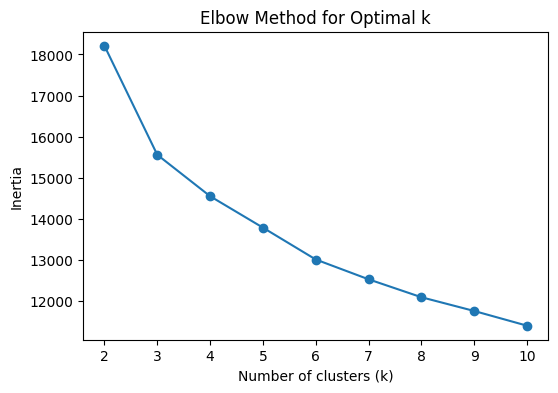

In [ ]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(6,4))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)
df[['Cluster'] + features].head()


,Cluster,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7
1,1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5
2,2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4
3,1,26646.0,26,11,4,20,10,3,5,2,2,0,4,6
4,3,58293.0,94,173,43,118,46,27,15,5,5,3,6,5


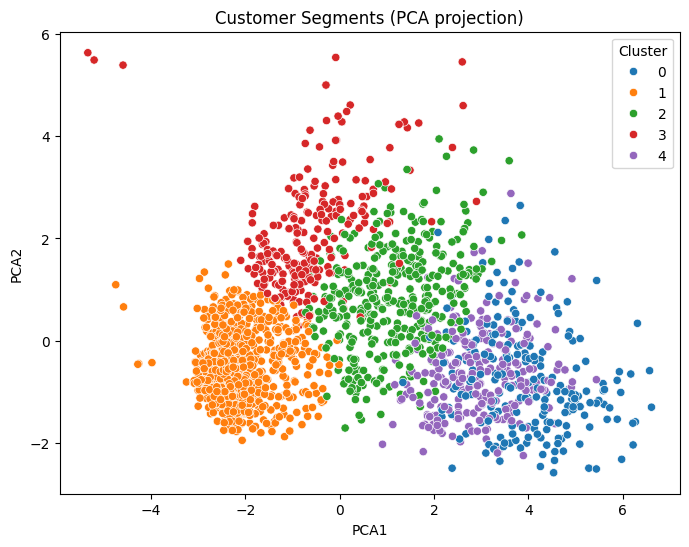

In [ ]:
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(X_scaled)
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10')
plt.title('Customer Segments (PCA projection)')
plt.show()


,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,,,,,,,,
0,74765.70,48.11,530.48,107.51,438.00,134.47,103.54,97.55,1.47,5.57,5.70,8.42,2.99
1,34223.54,48.95,38.59,4.80,20.92,7.13,4.96,14.85,1.88,2.01,0.53,3.20,6.37
2,62625.77,48.42,540.02,30.74,160.71,36.65,29.07,65.70,2.44,6.47,3.52,8.59,5.02
3,49253.52,47.72,318.18,10.78,95.07,17.51,13.15,51.24,5.84,6.11,2.06,6.00,7.24
4,77227.76,51.92,673.36,39.75,492.29,80.22,48.16,60.73,1.20,4.76,6.49,8.37,2.57


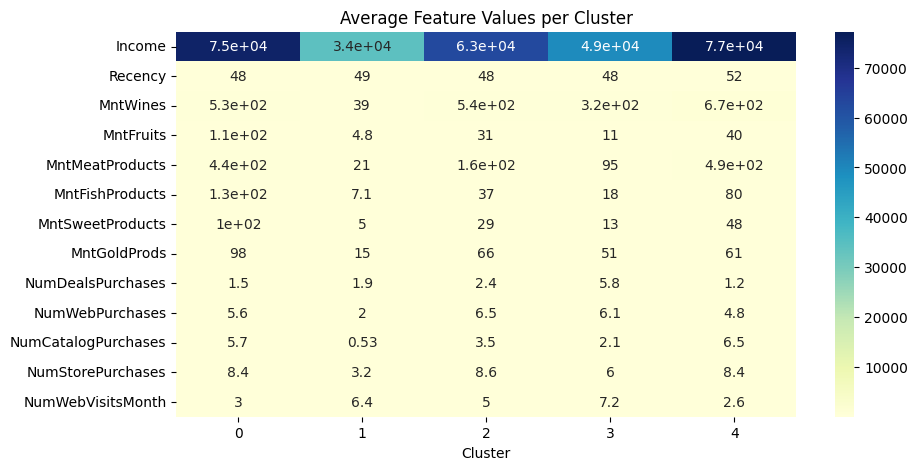

In [ ]:
cluster_profile = df.groupby('Cluster')[features].mean().round(2)
display(cluster_profile)
plt.figure(figsize=(10,5))
sns.heatmap(cluster_profile.T, cmap="YlGnBu", annot=True)
plt.title("Average Feature Values per Cluster")
plt.show()


In [ ]:
score = silhouette_score(X_scaled, df['Cluster'])
print("Silhouette Score:", round(score,3))


Silhouette Score: 0.251


In [ ]:
df.to_csv("ifood_customer_segments.csv", index=False)
print("✅ Segmented data saved as 'ifood_customer_segments.csv'")


✅ Segmented data saved as 'ifood_customer_segments.csv'


In [ ]:
print("🔍 INTERPRETATION OF CUSTOMER SEGMENTS\n")
for cluster_id, row in cluster_profile.iterrows():
    print(f"🟩 Cluster {cluster_id}:")
    high_spend = [col for col in ['MntWines','MntMeatProducts','MntGoldProds','MntSweetProducts'] if row[col] > cluster_profile[col].mean()]
    low_spend = [col for col in ['MntWines','MntMeatProducts','MntGoldProds','MntSweetProducts'] if row[col] < cluster_profile[col].mean()]
    if row['Income'] > cluster_profile['Income'].mean():
        income_desc = "High income group"
    elif row['Income'] < cluster_profile['Income'].mean():
        income_desc = "Low income group"
    else:
        income_desc = "Average income group"
    if row['NumWebPurchases'] > cluster_profile['NumWebPurchases'].mean():
        shop_desc = "prefers online purchases"
    elif row['NumStorePurchases'] > cluster_profile['NumStorePurchases'].mean():
        shop_desc = "prefers store purchases"
    else:
        shop_desc = "buys occasionally"
    print(f" - {income_desc}")
    print(f" - {shop_desc}")
    print(f" - High spend on: {', '.join(high_spend) if high_spend else 'none'}")
    print(f" - Low spend on: {', '.join(low_spend) if low_spend else 'none'}")
    if row['Recency'] < cluster_profile['Recency'].mean():
        print(" - Recently purchased (active customers)")
    else:
        print(" - Not recent (inactive or lost customers)")
    print("\n---------------------------------\n")
print("✅ Insights generated successfully!")


🔍 INTERPRETATION OF CUSTOMER SEGMENTS

🟩 Cluster 0:
 - High income group
 - prefers online purchases
 - High spend on: MntWines, MntMeatProducts, MntGoldProds, MntSweetProducts
 - Low spend on: none
 - Recently purchased (active customers)

---------------------------------

🟩 Cluster 1:
 - Low income group
 - buys occasionally
 - High spend on: none
 - Low spend on: MntWines, MntMeatProducts, MntGoldProds, MntSweetProducts
 - Recently purchased (active customers)

---------------------------------

🟩 Cluster 2:
 - High income group
 - prefers online purchases
 - High spend on: MntWines, MntGoldProds
 - Low spend on: MntMeatProducts, MntSweetProducts
 - Recently purchased (active customers)

---------------------------------

🟩 Cluster 3:
 - Low income group
 - prefers online purchases
 - High spend on: none
 - Low spend on: MntWines, MntMeatProducts, MntGoldProds, MntSweetProducts
 - Recently purchased (active customers)

---------------------------------

🟩 Cluster 4:
 - High income 

In [ ]:
summary_data = []
for cluster_id, row in cluster_profile.iterrows():
    income_level = (
        "High" if row["Income"] > cluster_profile["Income"].mean()
        else "Low" if row["Income"] < cluster_profile["Income"].mean()
        else "Average"
    )
    recent_status = (
        "Active (recent buyers)" if row["Recency"] < cluster_profile["Recency"].mean()
        else "Inactive (not recent)"
    )
    spend_high = [col for col in ['MntWines','MntMeatProducts','MntGoldProds','MntSweetProducts'] if row[col] > cluster_profile[col].mean()]
    spend_low = [col for col in ['MntWines','MntMeatProducts','MntGoldProds','MntSweetProducts'] if row[col] < cluster_profile[col].mean()]
    purchase_channel = (
        "Prefers Online" if row["NumWebPurchases"] > cluster_profile["NumWebPurchases"].mean()
        else "Prefers Store" if row["NumStorePurchases"] > cluster_profile["NumStorePurchases"].mean()
        else "Occasional Buyer"
    )
    summary_data.append({
        "Cluster": cluster_id,
        "Income Level": income_level,
        "Purchase Behavior": purchase_channel,
        "Recent Activity": recent_status,
        "High Spend On": ", ".join(spend_high) if spend_high else "None",
        "Low Spend On": ", ".join(spend_low) if spend_low else "None"
    })
summary_report = pd.DataFrame(summary_data)
display(summary_report)
summary_report.to_csv("Customer_Segmentation_Summary.csv", index=False)
print("✅ Summary saved as 'Customer_Segmentation_Summary.csv'")


,Cluster,Income Level,Purchase Behavior,Recent Activity,High Spend On,Low Spend On
0,0,High,Prefers Online,Active (recent buyers),"MntWines, MntMeatProducts, MntGoldProds, MntSw...",None
1,1,Low,Occasional Buyer,Active (recent buyers),None,"MntWines, MntMeatProducts, MntGoldProds, MntSw..."
2,2,High,Prefers Online,Active (recent buyers),"MntWines, MntGoldProds","MntMeatProducts, MntSweetProducts"
3,3,Low,Prefers Online,Active (recent buyers),None,"MntWines, MntMeatProducts, MntGoldProds, MntSw..."
4,4,High,Prefers Store,Inactive (not recent),"MntWines, MntMeatProducts, MntGoldProds, MntSw...",None


✅ Summary saved as 'Customer_Segmentation_Summary.csv'


In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    df,
    x='MntWines',
    y='MntMeatProducts',
    z='Income',
    color='Cluster',
    hover_data=['NumWebPurchases', 'NumStorePurchases', 'Recency'],
    title='Interactive 3D Customer Segmentation Visualization',
    color_continuous_scale='Viridis'
)

fig.update_traces(marker=dict(size=5, line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(legend_title_text='Cluster', height=600)
fig.show()
